In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=pd.read_csv('Pima.csv')

In [13]:
columns=data.columns
#columns= [col_name for col_name in columns if not col_name=="Outcome"]
data.head()

x1   x2  x3  x4   x5    x6     x7  x8  class
0   6  148  72  35    0  33.6  0.627  50      1
1   1   85  66  29    0  26.6  0.351  31      0
2   8  183  64   0    0  23.3  0.672  32      1
3   1   89  66  23   94  28.1  0.167  21      0
4   0  137  40  35  168  43.1  2.288  33      1

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

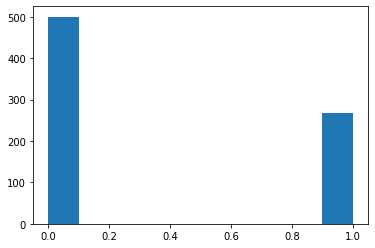

In [14]:
plt.hist(data['class'])

In [15]:
y=data['class']

In [16]:
X=data.drop(["class"],axis=1)

In [17]:
X.head()

x1   x2  x3  x4   x5    x6     x7  x8
0   6  148  72  35    0  33.6  0.627  50
1   1   85  66  29    0  26.6  0.351  31
2   8  183  64   0    0  23.3  0.672  32
3   1   89  66  23   94  28.1  0.167  21
4   0  137  40  35  168  43.1  2.288  33

In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [19]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [20]:
train_X.head()

x1   x2  x3  x4   x5    x6     x7  x8
219   5  112  66   0    0  37.8  0.261  41
210   2   81  60  22    0  27.7  0.290  25
86   13  106  72  54    0  36.6  0.178  45
80    3  113  44  13    0  22.4  0.140  22
338   9  152  78  34  171  34.2  0.893  33

In [21]:
test_y.head()

321    1
400    1
249    0
385    0
620    0
Name: class, dtype: int64

In [22]:
train_mean_pos=train_X[train_y==1].mean()
train_std_pos=train_X[train_y==1].std()
train_mean_neg=train_X[train_y==0].mean()
train_std_neg=train_X[train_y==0].std()

In [23]:
train_mean_pos

x1      4.898936
x2    138.632979
x3     71.069149
x4     22.452128
x5     93.595745
x6     35.080319
x7      0.571234
x8     37.148936
dtype: float64

In [24]:
train_std_pos

x1      3.769480
x2     32.565333
x3     20.893939
x4     17.645434
x5    129.579519
x6      6.736475
x7      0.364395
x8     11.335862
dtype: float64

In [25]:
train_mean_neg

x1      3.332378
x2    111.114613
x3     67.418338
x4     19.255014
x5     65.232092
x6     29.955874
x7      0.435318
x8     31.275072
dtype: float64

In [26]:
train_std_neg

x1     2.940719
x2    25.021337
x3    18.234498
x4    14.974529
x5    90.114330
x6     7.830360
x7     0.294362
x8    11.581743
dtype: float64

In [27]:
summary={"train_mean_pos": train_mean_pos.tolist(), "train_std_pos" :train_std_pos.tolist(), "train_mean_neg" :train_mean_neg.tolist(),
        "train_std_neg": train_std_neg.tolist()}

In [28]:
summary

{'train_mean_pos': [4.898936170212766,
  138.63297872340425,
  71.06914893617021,
  22.45212765957447,
  93.59574468085107,
  35.080319148936184,
  0.5712340425531915,
  37.148936170212764],
 'train_std_pos': [3.769480444230131,
  32.56533338802693,
  20.893939077658565,
  17.64543375344602,
  129.57951900860448,
  6.736474736552414,
  0.3643952113637798,
  11.335861836141815],
 'train_mean_neg': [3.332378223495702,
  111.11461318051576,
  67.41833810888252,
  19.255014326647565,
  65.23209169054441,
  29.95587392550143,
  0.4353180515759311,
  31.275071633237822],
 'train_std_neg': [2.940718950952293,
  25.02133661180633,
  18.234497638452588,
  14.97452853871169,
  90.11433032754773,
  7.830360243774098,
  0.29436208885845383,
  11.581742608446383]}

In [29]:
import numpy as np
def cond_prob(x,mn,stddv):
    varnc=stddv*stddv
    p=1/np.sqrt(2*np.pi*varnc)*np.exp((-(x-mn)**2)/(2*varnc))
    return p

In [30]:
def predict(row,summary):
    prob_positive=len(summary["train_mean_pos"])/(len(summary["train_mean_pos"])+len(summary["train_mean_neg"]))
    #print(prob_positive)
    
    for i in range (0,len(row)):
        c=cond_prob(row[i],summary["train_mean_pos"][i],summary["train_std_pos"][i])
        prob_positive=prob_positive*c
        #print(prob_positive)
        
    prob_negative=len(summary["train_mean_neg"])/(len(summary["train_mean_pos"])+len(summary["train_mean_neg"]))
    
    for i in range(0,len(row)):
        c=cond_prob(row[i],summary["train_mean_neg"][i],summary["train_std_neg"][i])
        prob_negative=prob_negative*c
        #print(c)
                    
    return [prob_positive,prob_negative]

In [31]:
predictions_raw=[]
for row in test_X.values.tolist():
    predictions_raw.append(predict(row,summary))

In [32]:
predictions_raw

[[2.5090940678234166e-13, 2.2357880449970313e-12],
 [1.0403173755552449e-13, 1.0884135608802627e-12],
 [8.23247171383711e-14, 1.0495245585899412e-12],
 [2.866974001715684e-14, 1.1911530460513931e-12],
 [1.6532070014242476e-13, 2.8237511517977934e-13],
 [1.2484705636938642e-13, 1.1466191525645346e-13],
 [5.076996854540599e-13, 8.128392236819137e-13],
 [5.015936493462319e-13, 8.235384439869966e-13],
 [3.9679410949975995e-13, 7.033417278870074e-13],
 [6.09448308998982e-16, 1.5187782934239516e-16],
 [3.1580804742899127e-14, 1.2817445601291473e-13],
 [4.255783322757228e-15, 5.475494014086735e-18],
 [2.4820874499748337e-13, 2.5948993599053948e-14],
 [1.7002577661373097e-17, 1.2333839036586276e-16],
 [1.1890840835858103e-13, 7.694721370899533e-14],
 [1.7102557020086792e-14, 4.022851009151275e-13],
 [1.831251882394005e-16, 3.624878378731781e-17],
 [4.698413482557055e-22, 1.0056306432198264e-19],
 [5.552912054019847e-14, 5.899550452190437e-13],
 [9.512116097329942e-14, 1.9563377677272936e-12],


In [37]:
predictions=[]
for row in predictions_raw:
    if(row[0]>row[1]):
        predictions.append(1)
    else:
        predictions.append(0)
    

In [38]:
confusion_matrix(test_y,predictions)


array([[113,  38],
       [ 18,  62]])